## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi


/bin/bash: nvidia-smi: command not found


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [111]:
train, test = keras.datasets.cifar10.load_data()

In [112]:
## 資料前處理
"""
Your code here
"""
import numpy as np

def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [113]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)


In [114]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)              

In [118]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 80
BATCH_SIZE = 256

In [119]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [120]:
# print(y_test.shape)
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/80
196/196 [==============================] - 4s 23ms/step - loss: 0.7431 - accuracy: 0.7378 - val_loss: 1.5474 - val_accuracy: 0.5416
Epoch 2/80
196/196 [==============================] - 5s 28ms/step - loss: 0.6648 - accuracy: 0.7640 - val_loss: 1.5895 - val_accuracy: 0.5373
Epoch 3/80
196/196 [==============================] - 6s 30ms/step - loss: 0.6110 - accuracy: 0.7843 - val_loss: 1.6502 - val_accuracy: 0.5390
Epoch 4/80
196/196 [==============================] - 5s 27ms/step - loss: 0.5662 - accuracy: 0.7975 - val_loss: 1.7544 - val_accuracy: 0.5325
Epoch 5/80
196/196 [==============================] - 5s 27ms/step - loss: 0.5134 - accuracy: 0.8179 - val_loss: 1.8531 - val_accuracy: 0.5220
Epoch 6/80
196/196 [==============================] - 6s 29ms/step - loss: 0.4791 - accuracy: 0.8301 - val_loss: 1.9592 - val_accuracy: 0.5231
Epoch 7/80
196/196 [==============================] - 6s 31ms/step - loss: 0.4461 - accuracy: 0.8412 - val_loss: 1.9926 - val_accuracy: 0.5384

Epoch 58/80
196/196 [==============================] - 5s 24ms/step - loss: 0.0927 - accuracy: 0.9695 - val_loss: 4.1435 - val_accuracy: 0.5305
Epoch 59/80
196/196 [==============================] - 5s 23ms/step - loss: 0.0759 - accuracy: 0.9752 - val_loss: 4.4158 - val_accuracy: 0.5339
Epoch 60/80
196/196 [==============================] - 5s 23ms/step - loss: 0.1047 - accuracy: 0.9666 - val_loss: 4.2551 - val_accuracy: 0.5319
Epoch 61/80
196/196 [==============================] - 4s 22ms/step - loss: 0.1109 - accuracy: 0.9638 - val_loss: 4.2257 - val_accuracy: 0.5367
Epoch 62/80
196/196 [==============================] - 4s 23ms/step - loss: 0.0998 - accuracy: 0.9683 - val_loss: 4.2900 - val_accuracy: 0.5289
Epoch 63/80
196/196 [==============================] - 4s 23ms/step - loss: 0.0700 - accuracy: 0.9767 - val_loss: 4.4550 - val_accuracy: 0.5355
Epoch 64/80
196/196 [==============================] - 5s 24ms/step - loss: 0.0658 - accuracy: 0.9782 - val_loss: 4.5403 - val_accuracy:

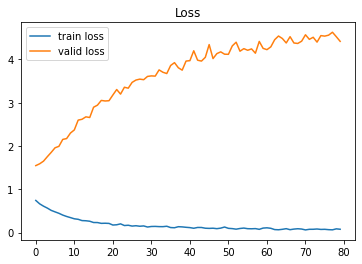

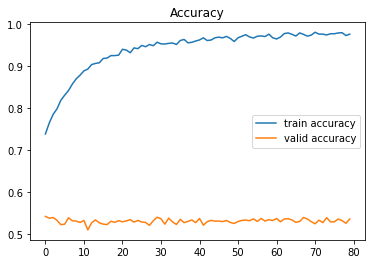

In [121]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()